# Support Vector Machine (SVM)
- SVM's are based on the idea of finding a hyperplane that best divides a dataset intotwo classes
- Used for both Classification and Regression models

## HyperPlane
- A hyperplane is a line that linearly separets and classifies a set of data

## How to find Right hyperplane
- The distance between the hyperplane and the nearest data pointfrom either set is known as margin
- SVM's goal is to choose a hyperplane with greatest possible margin  between the hyperplane and any point.

# SVM Formula
### Basic Formula 
- Yi = b0 + b1*Xi

### For all Xi values
- if Yi = -1, b1*Xi + b0 <= -1 (belongs to -ve bclass)
- if Yi = +1, b1*Xi + b0 >= +1 (belongs to +ve bclass)

### For all SVM data points which decides the margin
- b1*Xi + b0 = -1, here Xi is -ve SV and Yi is -1
- b1*Xi + b0 = +1, here Xi is +ve SV and Yi is +1

### Decision Boundary
- Yi * ( b1*Xi +b0 ) = 0

### To maximize width (W)
- W = ( ('X+'  -  'X-')*b1 ) / |b1|

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets.samples_generator import make_blobs

In [12]:
X,Y = make_blobs(n_samples = 500,centers = 2,
                 random_state = 0,cluster_std = 0.40)

In [8]:
X

array([[ 7.37744463e-01,  4.28276041e+00],
       [ 2.12883772e+00,  7.43467756e-01],
       [ 8.16490467e-01,  4.45180968e+00],
       [ 1.66935855e+00,  4.57758777e+00],
       [ 2.43954488e+00,  1.42928880e+00],
       [ 1.16152221e+00,  4.41542563e+00],
       [ 5.25539755e-01,  4.01151623e+00],
       [ 7.90831689e-01,  4.49637992e+00],
       [ 2.38339624e+00,  1.44164308e+00],
       [ 2.05475970e+00,  4.27421746e+00],
       [ 5.62572942e-01,  4.57642513e+00],
       [ 6.54906213e-01,  4.02796742e+00],
       [ 2.73913845e-01,  4.48416111e+00],
       [ 2.90198393e+00,  2.53312299e-01],
       [ 9.91722299e-01,  3.64110129e+00],
       [ 1.95845959e+00,  1.50496813e+00],
       [ 9.69997234e-01,  4.36815859e+00],
       [ 1.40229820e+00,  8.70809998e-01],
       [ 2.06369233e+00,  9.37445443e-01],
       [ 1.04293948e+00,  4.55779990e+00],
       [ 8.37105219e-01,  4.36632692e+00],
       [ 1.78818243e+00,  1.57043236e+00],
       [ 2.25474363e+00,  1.31685252e+00],
       [ 7.

In [13]:
Y

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,

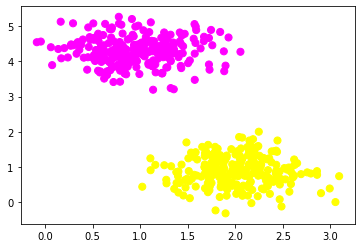

In [18]:
plt.scatter(X[:,0], X[:,1],c = Y,s = 50,cmap = 'spring')
plt.show()

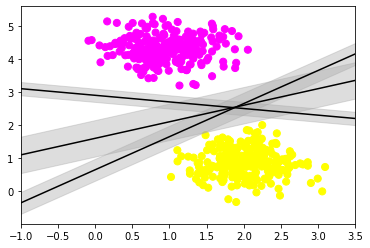

In [21]:
x1 = np.linspace(-1,3.5)
plt.scatter(X[:,0], X[:,1],c = Y,s = 50,cmap = 'spring')

for m, b, d in [(1,0.65,0.33),
                (0.5,1.6,0.55),
                (-0.2,2.9,0.2)]:
    y1 = m * x1 + b
    plt.plot(x1,y1,'black')
    plt.fill_between(x1, y1 - d, y1 + d, 
                     edgecolor = 'none',
                     color = '#AAAAAA',alpha = 0.4)
plt.xlim(-1,3.5);
plt.show()

In [2]:
df = pd.read_csv('Lung_Cancer.csv')

In [3]:
df.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


In [4]:
df.shape

(59, 7)

In [5]:
df.isnull().sum()

Name       0
Surname    0
Age        0
Smokes     0
AreaQ      0
Alkhol     0
Result     0
dtype: int64

In [12]:
X = df.iloc[:,2:6]
Y = df.iloc[:,6]

In [9]:
from sklearn.svm import SVC

In [14]:
sv = SVC(kernel = 'linear')
sv.fit(X,Y)
y_pred = sv.predict(X)

In [15]:
y_pred

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0], dtype=int64)

In [16]:
sv.predict([[68,4,5,6]])

array([1], dtype=int64)